## sklearn中的多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

在sklearn中的多项式回归，关键步骤是特征预处理，也就是升维

In [3]:
poly_feature = PolynomialFeatures()
poly_feature.fit(X)
X2 = poly_feature.transform(X)

In [4]:
X2[:5]

array([[1.        , 1.20262273, 1.44630143],
       [1.        , 2.06511986, 4.26472002],
       [1.        , 1.05908602, 1.12166319],
       [1.        , 1.36714834, 1.86909459],
       [1.        , 2.70874774, 7.33731434]])

In [5]:
X[:5]

array([[1.20262273],
       [2.06511986],
       [1.05908602],
       [1.36714834],
       [2.70874774]])

In [6]:
linear_reg = LinearRegression()
linear_reg.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
linear_reg.coef_

array([0.        , 1.00211316, 0.50409402])

In [8]:
linear_reg.intercept_

2.0153101519246723

## pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [11]:
poly_reg = Pipeline([
    ('ploynomial_features', PolynomialFeatures(degree=2)),
    ('standard_scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
    
])

In [12]:
poly_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('ploynomial_features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

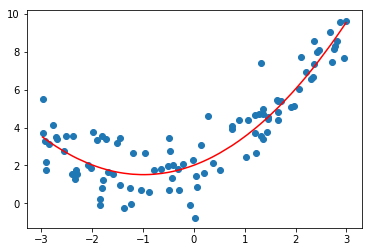

In [13]:
plt.scatter(X, y)
plt.plot(np.sort(x), poly_reg.predict(X)[np.argsort(x)], color='r')
plt.show()

In [21]:
poly_reg[-1].coef_

array([0.        , 1.82446133, 1.40848915])

In [22]:
poly_reg[-1].intercept_

3.639534383682677

In [28]:
sc = StandardScaler()
sc.fit(X2)
X2_sc = sc.transform(X2)
poly_reg[-1].score(X2_sc,y)

0.8196892855998191

In [29]:
poly_reg.score(X,y)

0.8196892855998191